GSS Lab

Why I selected the Data that I did: 

I wanted to look at major people graduated with compared to overall happiness and job satisfaction. I also included what type of institution people got educated from, their income, when they graduated college and year. Due to when data was collected to answer this question, I narrowed in on just data from 2012-2016, which you will see when I cleaned the data. 


In [1]:
import numpy as np #import variables
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd  

In [2]:
var_list = ['year','rincome', 'major1','voednme1','whencol','happy', 'satjob'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' #Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [9]:
df = pd.read_csv('/Users/averyanderson/selected_gss_data.csv',low_memory=False) #read in data

In [11]:
df.head()

,year,rincome,major1,voednme1,whencol,happy,satjob
0,1972,NaN,NaN,NaN,NaN,not too happy,a little dissatisfied
1,1972,NaN,NaN,NaN,NaN,not too happy,NaN
2,1972,NaN,NaN,NaN,NaN,pretty happy,moderately satisfied
3,1972,NaN,NaN,NaN,NaN,not too happy,very satisfied
4,1972,NaN,NaN,NaN,NaN,pretty happy,NaN


In [17]:
var = 'year' # A numeric variable
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric

In [67]:
df['happy'] = df['happy'].astype(str) #turn these from floats into str for later use
df['satjob'] = df['satjob'].astype(str)

In [69]:
df.head()

,year,rincome,major1,voednme1,whencol,happy,satjob
0,1972,NaN,NaN,NaN,NaN,not too happy,a little dissatisfied
1,1972,NaN,NaN,NaN,NaN,not too happy,nan
2,1972,NaN,NaN,NaN,NaN,pretty happy,moderately satisfied
3,1972,NaN,NaN,NaN,NaN,not too happy,very satisfied
4,1972,NaN,NaN,NaN,NaN,pretty happy,nan


In [189]:
conditional =  (df['year']>= 2012) #clean data so only points between 2012-2016
df2 = df[conditional] 

In [185]:
conditional =  (df2['year'] <= 2016) 
df3 = df2[conditional]

In [187]:
df3.head(5)

,year,rincome,major1,voednme1,whencol,happy,satjob
55087,2012,NaN,english,NaN,2012.0,very happy,very satisfied
55088,2012,NaN,NaN,NaN,NaN,very happy,very satisfied
55089,2012,"$25,000 or more",NaN,NaN,NaN,pretty happy,a little dissatisfied
55090,2012,NaN,NaN,NaN,NaN,very happy,nan
55091,2012,NaN,political science/international relations,jail/prison,1964.0,very happy,nan


In [77]:
cross_tab = pd.crosstab(df3['major1'], df3['rincome']) #get initial look at categories in these two columns
print(cross_tab)

rincome                                         $1,000 to $2,999  \
major1                                                             
accounting/bookkeeping                                         1   
administrative science/public administration                   1   
advertising                                                    0   
agriculture/horticulture                                       0   
allied health                                                  0   
...                                                          ...   
theater arts                                                   0   
theology                                                       0   
urban and regional planning                                    1   
veterinary medicine                                            0   
visual arts/graphic design/design and drafting                 1   

rincome                                         $10,000 to $14,999  \
major1                                       

In [191]:
top_number = df3["voednme1"].value_counts().head(15)
print(top_number) #see most popular response for where people got education

voednme1
college/university                                                   597
vocational school/trades/technical (not high school, not college)    158
medical/nursing/health/dental/hospital                                77
other                                                                 69
insurance, real estate, finance, executive management                 52
beauty school/cosmetology                                             39
armed forces                                                          35
business college (not business school at a university)                33
unable to code response, unclear, not identifiable                    30
foreign college/university                                            29
company/business                                                      25
high school                                                           13
police/fire academy; training                                         12
job corp                                  

In [81]:
top_number = df3["major1"].value_counts().head(15)
print(top_number) #see top majors, then use that information to narrow down dataset

major1
business administration                      1072
education                                     655
engineering                                   380
nursing                                       369
psychology                                    250
accounting/bookkeeping                        230
computer science                              214
biology                                       208
health                                        208
english                                       185
medicine                                      165
communications/speech                         161
criminology/criminal justice                  150
political science/international relations     146
law                                           145
Name: count, dtype: int64


In [83]:
conditional =  (df3['major1'] == 'business administration')
df_ba = df3[conditional]

In [85]:
df_ba.head()

,year,rincome,major1,voednme1,whencol,happy,satjob
55093,2012,NaN,business administration,NaN,2003.0,pretty happy,very satisfied
55117,2012,NaN,business administration,NaN,1957.0,pretty happy,nan
55118,2012,"$25,000 or more",business administration,company/business,1986.0,very happy,very satisfied
55129,2012,"$25,000 or more",business administration,college/university,2003.0,pretty happy,moderately satisfied
55134,2012,"$25,000 or more",business administration,NaN,1967.0,very happy,very satisfied


In [87]:
conditional =  (df3['major1'] == 'law') #narrow down dataset to only include top 15 major responses
df_law = df3[conditional]
conditional =  (df3['major1'] == 'education')
df_ed = df3[conditional]
conditional =  (df3['major1'] == 'engineering')
df_engi = df3[conditional]
conditional =  (df3['major1'] == 'nursing')
df_nur = df3[conditional]
conditional =  (df3['major1'] == 'psychology')
df_psych = df3[conditional]
conditional =  (df3['major1'] == 'accounting/bookkeeping')
df_acc = df3[conditional]
conditional =  (df3['major1'] == 'computer science')
df_cs = df3[conditional]
conditional =  (df3['major1'] == 'biology')
df_bio = df3[conditional]
conditional =  (df3['major1'] == 'health')
df_he = df3[conditional]
conditional =  (df3['major1'] == 'english')
df_eng = df3[conditional]
conditional =  (df3['major1'] == 'medicine')
df_med = df3[conditional]
conditional =  (df3['major1'] == 'communications/speech')
df_com = df3[conditional]
conditional =  (df3['major1'] == 'criminology/criminal justice')
df_crim = df3[conditional]
conditional =  (df3['major1'] == 'political science/international relations')
df_ps = df3[conditional]

In [89]:
df_health = pd.concat([df_med, df_bio,df_he,df_psych,df_nur], axis = 0) #create subsets by category for later use and one full set with all majors
df_hum = pd.concat([df_law,df_eng,df_ps,df_com,df_ed,df_crim], axis = 0)
df_math = pd.concat([df_acc,df_cs,df_engi,df_ba], axis = 0)
df_full = pd.concat([df_ba, df_law,df_ps,df_crim,df_com,df_med,df_eng,df_he,df_bio,df_cs,df_acc,df_psych,df_nur,df_engi,df_ed], axis = 0)

In [91]:
df_full.head()

,year,rincome,major1,voednme1,whencol,happy,satjob
55093,2012,NaN,business administration,NaN,2003.0,pretty happy,very satisfied
55117,2012,NaN,business administration,NaN,1957.0,pretty happy,nan
55118,2012,"$25,000 or more",business administration,company/business,1986.0,very happy,very satisfied
55129,2012,"$25,000 or more",business administration,college/university,2003.0,pretty happy,moderately satisfied
55134,2012,"$25,000 or more",business administration,NaN,1967.0,very happy,very satisfied


In [93]:
cross_tab = pd.crosstab(df_full['major1'], df_full['happy'])
print(cross_tab) #compare happiness across all majors

happy                                      nan  not too happy  pretty happy  \
major1                                                                        
accounting/bookkeeping                       0             29           132   
biology                                      3             33           122   
business administration                      2            150           603   
communications/speech                        0             22            94   
computer science                             0             32           137   
criminology/criminal justice                 0             29            98   
education                                    1             77           367   
engineering                                  3             52           217   
english                                      0             30           104   
health                                       2             33           117   
law                                          0      

In [95]:
cross_tab = pd.crosstab(df_full['major1'], df_full['satjob'])
print(cross_tab) #job satisfaction across majors

satjob                                     a little dissatisfied  \
major1                                                             
accounting/bookkeeping                                        16   
biology                                                        9   
business administration                                       71   
communications/speech                                         14   
computer science                                              13   
criminology/criminal justice                                  16   
education                                                     23   
engineering                                                   21   
english                                                       14   
health                                                        13   
law                                                           14   
medicine                                                       8   
nursing                                         

<Axes: >

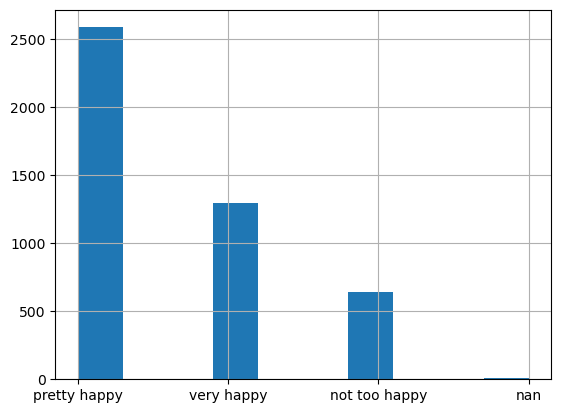

In [97]:
df_full['happy'].hist()

<Axes: >

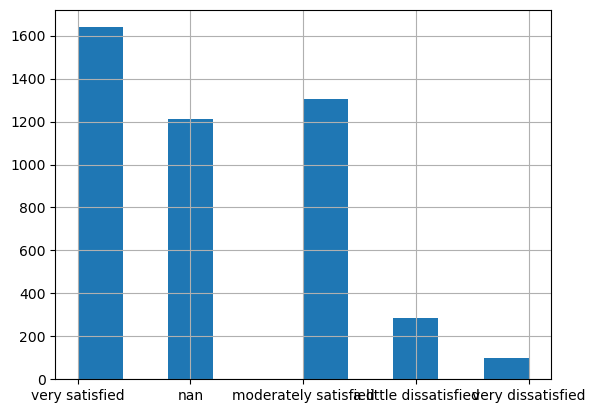

In [99]:
df_full['satjob'].hist()

(array([[364.,   0., 437.,   0.,   0., 520.,   0.,  94.,   0.,  27.],
        [578.,   0., 478.,   0.,   0., 679.,   0., 121.,   0.,  40.],
        [362.,   0., 299.,   0.,   0., 440.,   0.,  69.,   0.,  30.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 3 BarContainer objects>)

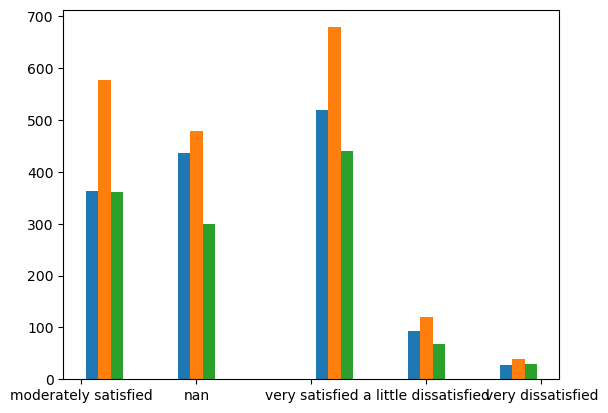

In [127]:
plt.hist([df_hum['satjob'], df_math['satjob'], df_health['satjob']])
#hum = blue, math = orange, health = green

In [239]:
x= df_hum['satjob'].value_counts().get('very dissatisfied', 0)
y= df_hum['satjob'].value_counts().get('a little dissatisfied', 0)
z= df_hum['satjob'].value_counts().get('moderately satisfied', 0)
w= df_hum['satjob'].value_counts().get('very satisfied', 0)
print(x,y,z,w)
print(x+y+z+w)

27 94 364 520
1005


In [241]:
x= df_math['satjob'].value_counts().get('very dissatisfied', 0)
y= df_math['satjob'].value_counts().get('a little dissatisfied', 0)
z= df_math['satjob'].value_counts().get('moderately satisfied', 0)
w= df_math['satjob'].value_counts().get('very satisfied', 0)
print(x,y,z,w)
print(x+y+z+w)

40 121 578 679
1418


In [243]:
x= df_health['satjob'].value_counts().get('very dissatisfied', 0)
y= df_health['satjob'].value_counts().get('a little dissatisfied', 0)
z= df_health['satjob'].value_counts().get('moderately satisfied', 0)
w= df_health['satjob'].value_counts().get('very satisfied', 0)
print(x,y,z,w)
print(x+y+z+w)

30 69 362 440
901


(array([[ 414.,    0.,    0.,  829.,    0.,    0.,  197.,    0.,    0.,
            2.],
        [ 539.,    0.,    0., 1089.,    0.,    0.,  263.,    0.,    0.,
            5.],
        [ 342.,    0.,    0.,  669.,    0.,    0.,  183.,    0.,    0.,
            6.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 3 BarContainer objects>)

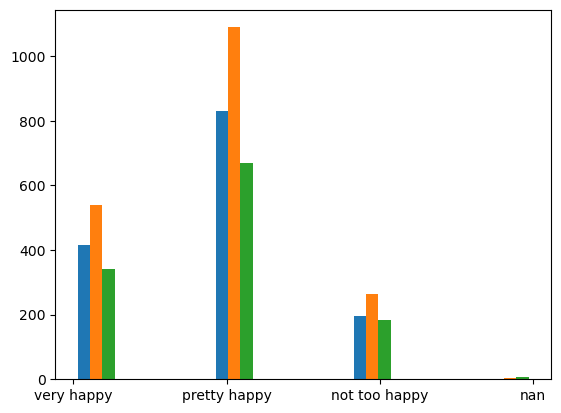

In [125]:
plt.hist([df_hum['happy'], df_math['happy'], df_health['happy']])
#hum = blue, math = orange, health = green

In [227]:
x= df_hum['happy'].value_counts().get('very happy', 0)
y= df_hum['happy'].value_counts().get('pretty happy', 0)
z= df_hum['happy'].value_counts().get('not too happy', 0)
print(x,y,z)
print(sx+y+z)

414 829 197
1440


In [229]:
x= df_math['happy'].value_counts().get('very happy', 0)
y= df_math['happy'].value_counts().get('pretty happy', 0)
z= df_math['happy'].value_counts().get('not too happy', 0)
print(x,y,z)
print(x+y+z)

539 1089 263
1891


In [231]:
x= df_health['happy'].value_counts().get('very happy', 0)
y= df_health['happy'].value_counts().get('pretty happy', 0)
z= df_health['happy'].value_counts().get('not too happy', 0)
print(x,y,z)
print(x+y+z)

342 669 183
1194


In [193]:
cross_tab = pd.crosstab(df_hum['happy'], df_full['major1'])
print(cross_tab)

major1         communications/speech  criminology/criminal justice  education  \
happy                                                                           
nan                                0                             0          1   
not too happy                     22                            29         77   
pretty happy                      94                            98        367   
very happy                        45                            23        210   

major1         english  law  political science/international relations  
happy                                                                   
nan                  0    0                                          1  
not too happy       30   24                                         15  
pretty happy       104   80                                         86  
very happy          51   41                                         44  


In [195]:
cross_tab = pd.crosstab(df_math['happy'], df_full['major1'])
print(cross_tab)

major1         accounting/bookkeeping  business administration  \
happy                                                            
nan                                 0                        2   
not too happy                      29                      150   
pretty happy                      132                      603   
very happy                         69                      317   

major1         computer science  engineering  
happy                                         
nan                           0            3  
not too happy                32           52  
pretty happy                137          217  
very happy                   45          108  


In [197]:
cross_tab = pd.crosstab(df_health['happy'], df_full['major1'])
print(cross_tab)

major1         biology  health  medicine  nursing  psychology
happy                                                        
nan                  3       2         0        1           0
not too happy       33      33        34       36          47
pretty happy       122     117        78      219         133
very happy          50      56        53      113          70


In [199]:
cross_tab = pd.crosstab(df_hum['satjob'], df_full['major1'])
print(cross_tab)

major1                 communications/speech  criminology/criminal justice  \
satjob                                                                       
a little dissatisfied                     14                            16   
moderately satisfied                      53                            48   
nan                                       21                            25   
very dissatisfied                          5                             3   
very satisfied                            68                            58   

major1                 education  english  law  \
satjob                                           
a little dissatisfied         23       14   14   
moderately satisfied         151       46   29   
nan                          247       61   37   
very dissatisfied              9        3    5   
very satisfied               225       61   60   

major1                 political science/international relations  
satjob                             

In [201]:
cross_tab = pd.crosstab(df_math['satjob'], df_full['major1'])
print(cross_tab)

major1                 accounting/bookkeeping  business administration  \
satjob                                                                   
a little dissatisfied                      16                       71   
moderately satisfied                       69                      328   
nan                                        48                      272   
very dissatisfied                           4                       28   
very satisfied                             93                      373   

major1                 computer science  engineering  
satjob                                                
a little dissatisfied                13           21  
moderately satisfied                 73          108  
nan                                  47          111  
very dissatisfied                     3            5  
very satisfied                       78          135  


In [203]:
cross_tab = pd.crosstab(df_health['satjob'], df_full['major1'])
print(cross_tab)

major1                 biology  health  medicine  nursing  psychology
satjob                                                               
a little dissatisfied        9      13         8       23          16
moderately satisfied        65      62        52       95          88
nan                         58      46        35       95          65
very dissatisfied            5       8         3        6           8
very satisfied              71      79        67      150          73


For this lab, I wanted to look into how majors compare to happiness and job satisfaction. To do this, I selected the top 15 most reported majors and divided them up by category: Health related majors, humanities, and miscellaneous math based majors. When I made comparative histograms to examine happiness across the three categories, I found that there appeared to be even proportions of happiness across majors. Across all three groups of majors, most people reported themselves to be “pretty happy” followed by “very happy” and “not too happy” was reported the least. With all three variables, about 13-15% reported “not too happy”, 55-58% reported “pretty happy” and 28-30% reported “very happy”. I found this consistency in happiness really interesting. The same consistency was evident in job satisfaction. Across all three categories of majors, about 3% reported being very dissatisfied, 9% reported a little satisfied, about 40% moderately satisfied and about 48% reporting very satisfied. I will note a slight difference in the humanities having 51% very satisfied and 36% moderately satisfied while both math and health majors had 47% very satisfied and 40% moderately satisfied. 

After looking at happiness and satisfaction across these three larger categories, I wanted to look at it more specifically by major. In the group of humanities majors, once again, there was across the board consistency in happiness. About 15% not too happy, 55% pretty happy, and 30% very happy. The only notable exception was those who had criminology or criminal justice majors who reported 20% not too happy, 65% pretty happy and only 15% very happy. For job satisfaction in the humanities group, the breakdown was almost always about 2%,13%,37%, 48% for very dissatisfied, a little dissatisfied, moderately satisfied and very satisfied, respectfully. The two exceptions were those with education and law majors who were both 55% very satisfied. Law had higher reports of dissatisfaction and 27% moderately dissatisfaction. Education, on the other hand, had 38% moderately satisfied with only 7% in one of the two dissatisfied categories. In the miscellaneous math group, there was a clear happiness outlier with those who reported a cs major having 64% pretty happy and only 21% very happy. This compares to the other three categories of accounting, business administration and engineering who all had a 13%, 57%, 30% breakdown for not too happy, pretty happy and very happy respectfully. For job satisfaction in this category, it was very consistent across the board with a 3%,8%,41%,46% breakdown in increasing order of job satisfaction. Finally the medical related major category. Again, saw similarities in happiness with about 16%, 60% and 25% for the corresponding happiness categories across the board. I will note, though, that Nursing had just 10% say not too happy and then 60% pretty happy and 30% very happy. Nursing also stood out in job satisfaction with 54% saying very satisfied. Psychology, on the other hand, stood out as being the only category to have more people report moderately satisfied over very satisfied with 47% saying moderately satisfied and 40% saying very satisfied. 


A couple notes about these results. First, I want to acknowledge that a major does not necessarily correspond to a job in that field. However, I used the job satisfaction variable as an additional measure of overall contentment alongside happiness. No matter what career one ended up with, I wanted to see if the major they chose could potentially correlate to how they felt later in life. While I cannot make any clear conclusions from this initial use of data, it was nice to see no glaring differences in happiness and job satisfaction across majors, which makes me hope that what you choose as your college major may not be the life altering decision it can feel like. 